<a href="https://colab.research.google.com/github/dineshmaddi25/Automated-Parking-Solutions/blob/main/CPU_USAGE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
file_path = '/content/main.csv.xlsx'
data = pd.read_excel(file_path)



In [5]:
print(data.describe())

       Timestamp [ms]  \tCPU cores  \tCPU capacity provisioned [MHZ]  \
count    9.980000e+02        998.0                      9.980000e+02   
mean     1.372779e+09          2.0                      5.851999e+03   
std      8.648337e+04          0.0                      5.459704e-12   
min      1.372630e+09          2.0                      5.851999e+03   
25%      1.372705e+09          2.0                      5.851999e+03   
50%      1.372779e+09          2.0                      5.851999e+03   
75%      1.372854e+09          2.0                      5.851999e+03   
max      1.372929e+09          2.0                      5.851999e+03   

       \tCPU usage [MHZ]  \tCPU usage [%]  \tMemory capacity provisioned [KB]  \
count         998.000000       998.000000                        9.980000e+02   
mean          259.240222         4.429943                        8.338069e+06   
std           303.394735         5.184463                        7.765447e+04   
min             0.000000   

In [4]:
print(data.head())

   Timestamp [ms]  \tCPU cores  \tCPU capacity provisioned [MHZ]  \
0      1372629804            2                         5851.9989   
1      1372630104            2                         5851.9989   
2      1372630404            2                         5851.9989   
3      1372630704            2                         5851.9989   
4      1372631004            2                         5851.9989   

   \tCPU usage [MHZ]  \tCPU usage [%]  \tMemory capacity provisioned [KB]  \
0          87.779984         1.500000                           8218624.0   
1          29.259995         0.500000                           8218624.0   
2          27.309328         0.466667                           8218624.0   
3          23.407996         0.400000                           8218624.0   
4          19.506663         0.333333                           8218624.0   

   \tMemory usage [KB]  \tDisk read throughput [KB/s]  \
0         1.034593e+06                     160.866667   
1         4.58

In [6]:
print(data.isnull().sum())


Timestamp [ms]                             0
\tCPU cores                                0
\tCPU capacity provisioned [MHZ]           0
\tCPU usage [MHZ]                          0
\tCPU usage [%]                            0
\tMemory capacity provisioned [KB]         0
\tMemory usage [KB]                        0
\tDisk read throughput [KB/s]              0
\tDisk write throughput [KB/s]             0
\tNetwork received throughput [KB/s]       0
\tNetwork transmitted throughput [KB/s]    0
dtype: int64


In [7]:
data_cleaned = data.dropna()


In [27]:
data_cleaned['Timestamp'] = pd.to_datetime(data_cleaned['Timestamp [ms]'], unit='ms')

# Print the actual column names

data_cleaned['Timestamp'] = pd.to_datetime(data_cleaned['Timestamp [ms]'], unit='ms')

# Step 7: Convert Data Types if necessary
data_cleaned['CPU usage [%]'] = pd.to_numeric(data_cleaned['\tCPU usage [%]'], errors='coerce')
data_cleaned['Memory usage [KB]'] = pd.to_numeric(data_cleaned['\tMemory usage [KB]'], errors='coerce')
print("Columns in the DataFrame:")
print(data_cleaned.columns)


Columns in the DataFrame:
Index(['Timestamp [ms]', '\tCPU cores', '\tCPU capacity provisioned [MHZ]',
       '\tCPU usage [MHZ]', '\tCPU usage [%]',
       '\tMemory capacity provisioned [KB]', '\tMemory usage [KB]',
       '\tDisk read throughput [KB/s]', '\tDisk write throughput [KB/s]',
       '\tNetwork received throughput [KB/s]',
       '\tNetwork transmitted throughput [KB/s]', 'Timestamp', 'CPU usage [%]',
       'Memory usage [KB]'],
      dtype='object')


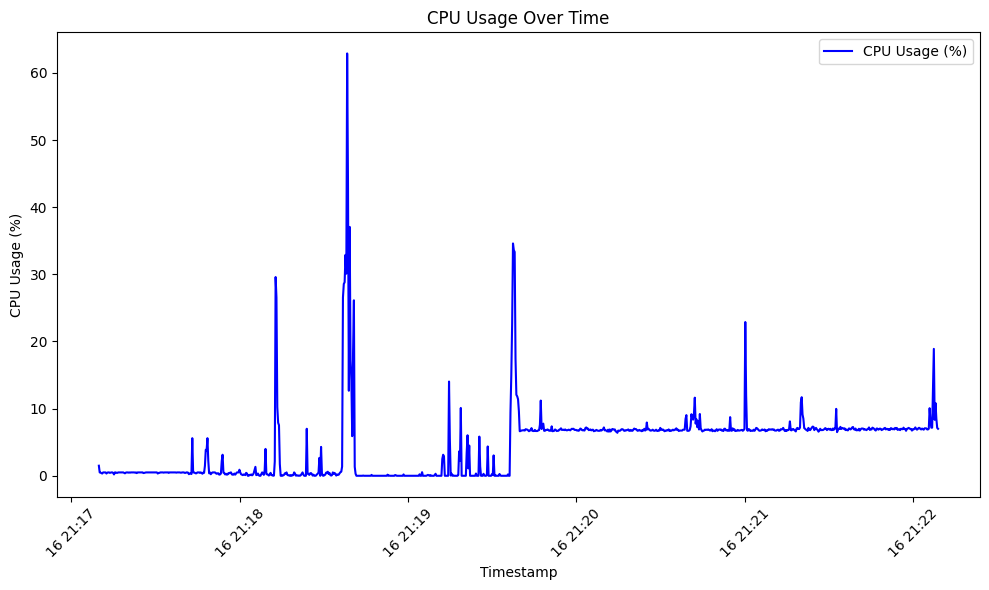

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(data_cleaned['Timestamp'], data_cleaned['\tCPU usage [%]'], color='b', label='CPU Usage (%)')
plt.xlabel('Timestamp')
plt.ylabel('CPU Usage (%)')
plt.title('CPU Usage Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

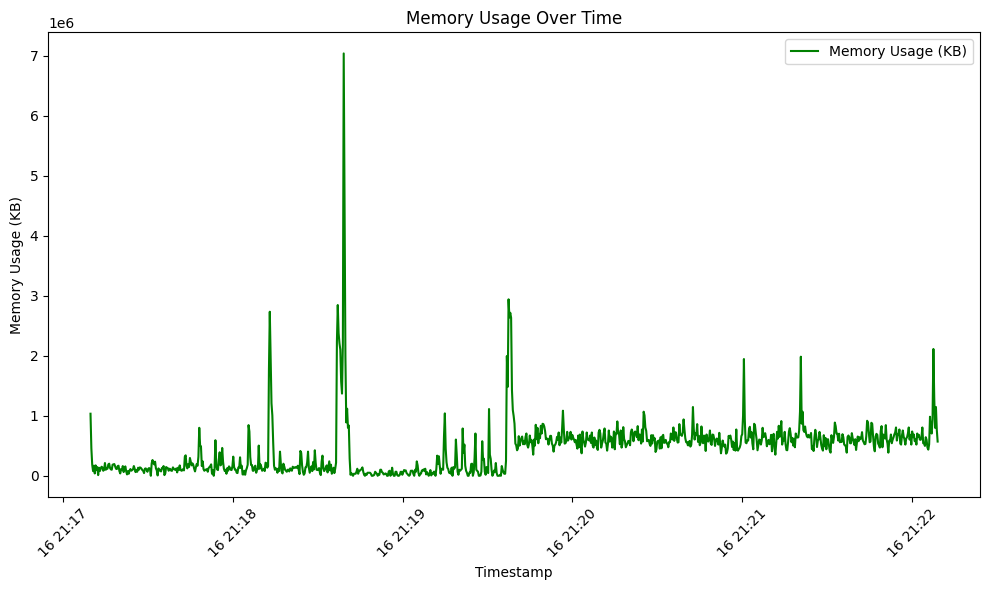

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(data_cleaned['Timestamp'], data_cleaned['\tMemory usage [KB]'], color='g', label='Memory Usage (KB)')
plt.xlabel('Timestamp')
plt.ylabel('Memory Usage (KB)')
plt.title('Memory Usage Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

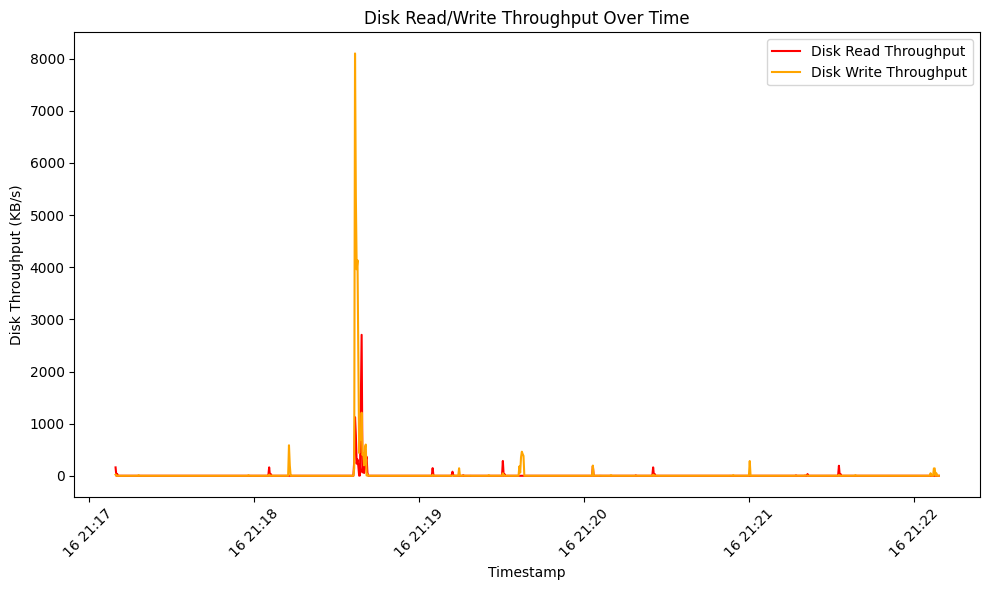

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(data_cleaned['Timestamp'], data_cleaned['\tDisk read throughput [KB/s]'], color='r', label='Disk Read Throughput')
plt.plot(data_cleaned['Timestamp'], data_cleaned['\tDisk write throughput [KB/s]'], color='orange', label='Disk Write Throughput')
plt.xlabel('Timestamp')
plt.ylabel('Disk Throughput (KB/s)')
plt.title('Disk Read/Write Throughput Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


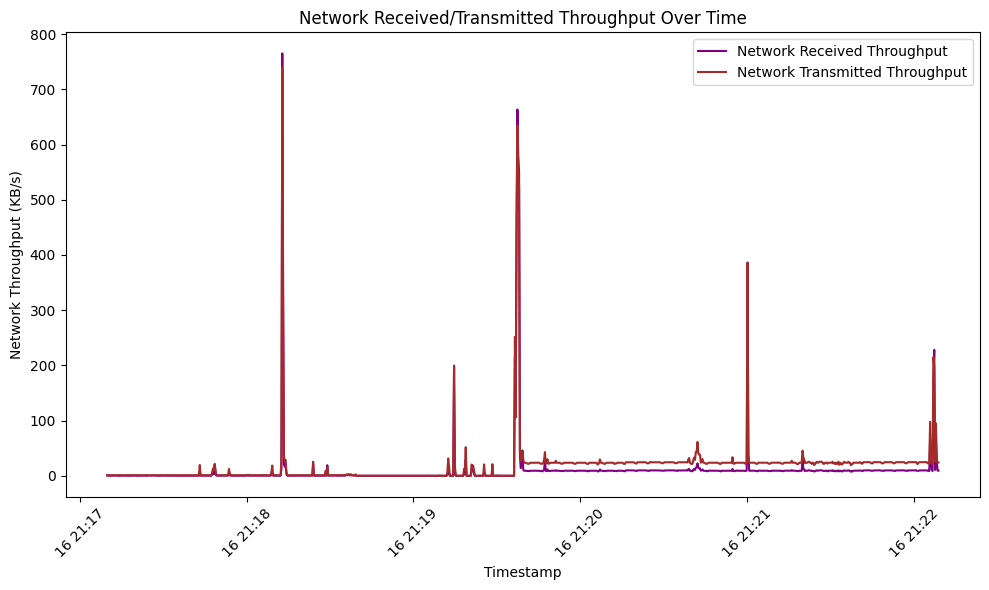

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(data_cleaned['Timestamp'], data_cleaned['\tNetwork received throughput [KB/s]'], color='purple', label='Network Received Throughput')
plt.plot(data_cleaned['Timestamp'], data_cleaned['\tNetwork transmitted throughput [KB/s]'], color='brown', label='Network Transmitted Throughput')
plt.xlabel('Timestamp')
plt.ylabel('Network Throughput (KB/s)')
plt.title('Network Received/Transmitted Throughput Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [32]:
print("\nSummary statistics for CPU, memory, disk, and network usage:")
summary_stats = data_cleaned[['\tCPU usage [%]', '\tMemory usage [KB]',
                              '\tDisk read throughput [KB/s]', '\tDisk write throughput [KB/s]',
                              '\tNetwork received throughput [KB/s]', '\tNetwork transmitted throughput [KB/s]']].describe()

print(summary_stats)


Summary statistics for CPU, memory, disk, and network usage:
       \tCPU usage [%]  \tMemory usage [KB]  \tDisk read throughput [KB/s]  \
count       998.000000         9.980000e+02                     998.000000   
mean          4.429943         4.397884e+05                       9.759485   
std           5.184463         4.596474e+05                     107.646508   
min           0.000000         0.000000e+00                       0.000000   
25%           0.266667         1.062544e+05                       0.000000   
50%           6.666667         4.697605e+05                       0.000000   
75%           6.866667         6.375327e+05                       0.000000   
max          62.900000         7.040835e+06                    2703.466667   

       \tDisk write throughput [KB/s]  \tNetwork received throughput [KB/s]  \
count                      998.000000                            998.000000   
mean                        33.880911                             10.002627  

In [34]:
output_cleaned_path = 'cleaned1_data.xlsx'
data_cleaned.to_excel(output_cleaned_path, index=False)
print(f"\nCleaned data saved to {output_cleaned_path}.")


Cleaned data saved to cleaned1_data.xlsx.


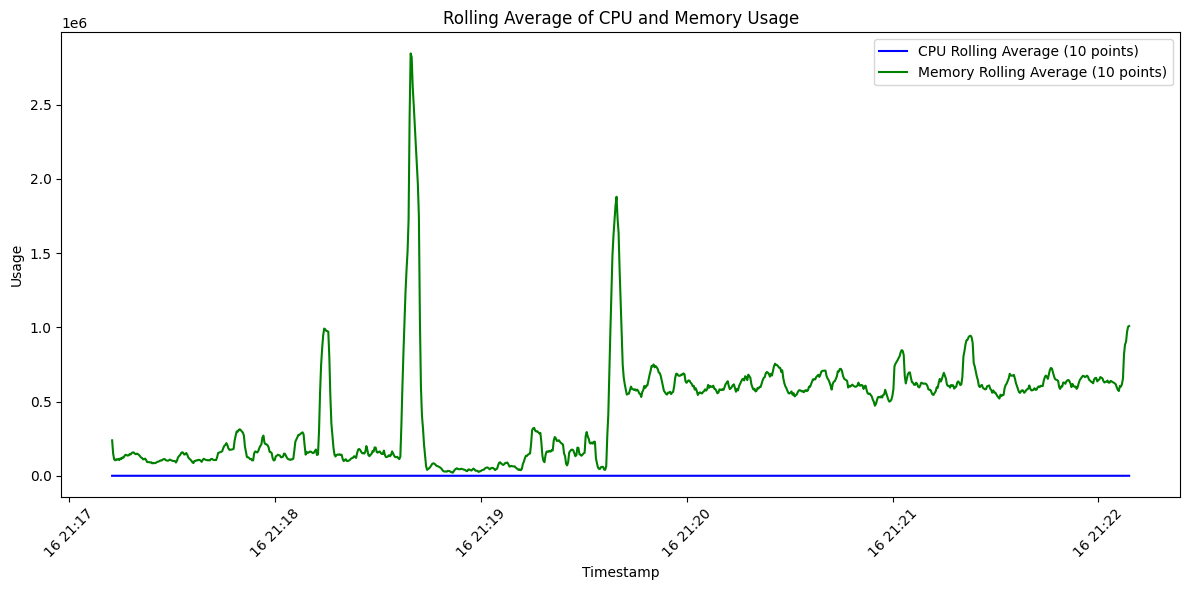

In [35]:
# Step 2: Feature Engineering - Rolling Averages for CPU and Memory Usage
data_cleaned['CPU_rolling_avg'] = data_cleaned['\tCPU usage [%]'].rolling(window=10).mean()
data_cleaned['Memory_rolling_avg'] = data_cleaned['\tMemory usage [KB]'].rolling(window=10).mean()

# Plotting the rolling averages for CPU and Memory Usage
plt.figure(figsize=(12, 6))
plt.plot(data_cleaned['Timestamp'], data_cleaned['CPU_rolling_avg'], color='blue', label='CPU Rolling Average (10 points)')
plt.plot(data_cleaned['Timestamp'], data_cleaned['Memory_rolling_avg'], color='green', label='Memory Rolling Average (10 points)')
plt.xlabel('Timestamp')
plt.ylabel('Usage')
plt.title('Rolling Average of CPU and Memory Usage')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


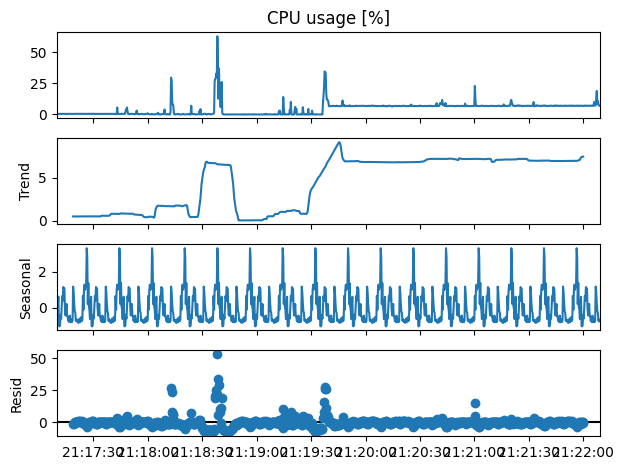

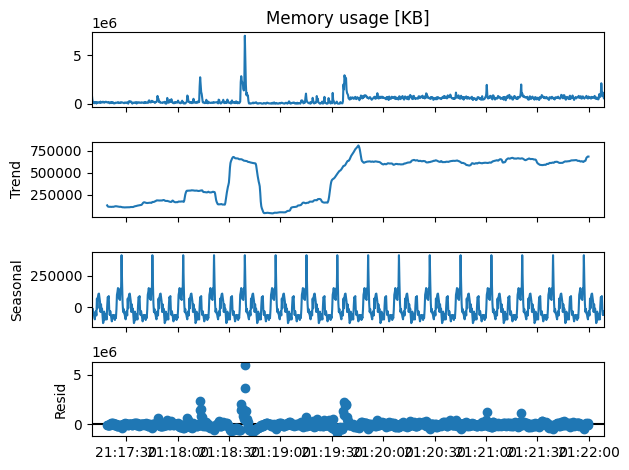

In [36]:
import statsmodels.api as sm

# Decompose the CPU usage time series
cpu_ts = data_cleaned.set_index('Timestamp')['CPU usage [%]']

decomposition = sm.tsa.seasonal_decompose(cpu_ts, model='additive', period=60)
decomposition.plot()
plt.show()

# Decompose the Memory usage time series
memory_ts = data_cleaned.set_index('Timestamp')['Memory usage [KB]']

decomposition_memory = sm.tsa.seasonal_decompose(memory_ts, model='additive', period=60)
decomposition_memory.plot()
plt.show()


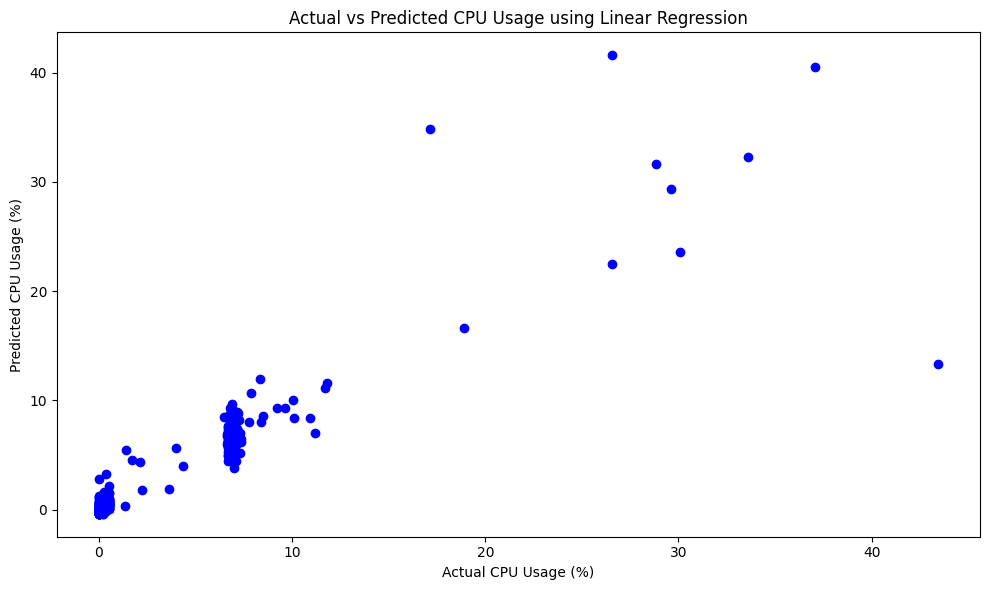

Mean Absolute Error: 0.9386629020536009
R-squared: 0.8237283032792329


In [38]:
# Step 5: Predict Future CPU Usage using Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Prepare the data
X = data_cleaned[['\tMemory usage [KB]', '\tDisk read throughput [KB/s]', '\tDisk write throughput [KB/s]',
                  '\tNetwork received throughput [KB/s]', '\tNetwork transmitted throughput [KB/s]']]
y = data_cleaned['\tCPU usage [%]']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Compare actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual CPU Usage (%)')
plt.ylabel('Predicted CPU Usage (%)')
plt.title('Actual vs Predicted CPU Usage using Linear Regression')
plt.tight_layout()
plt.show()

# Check model performance
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


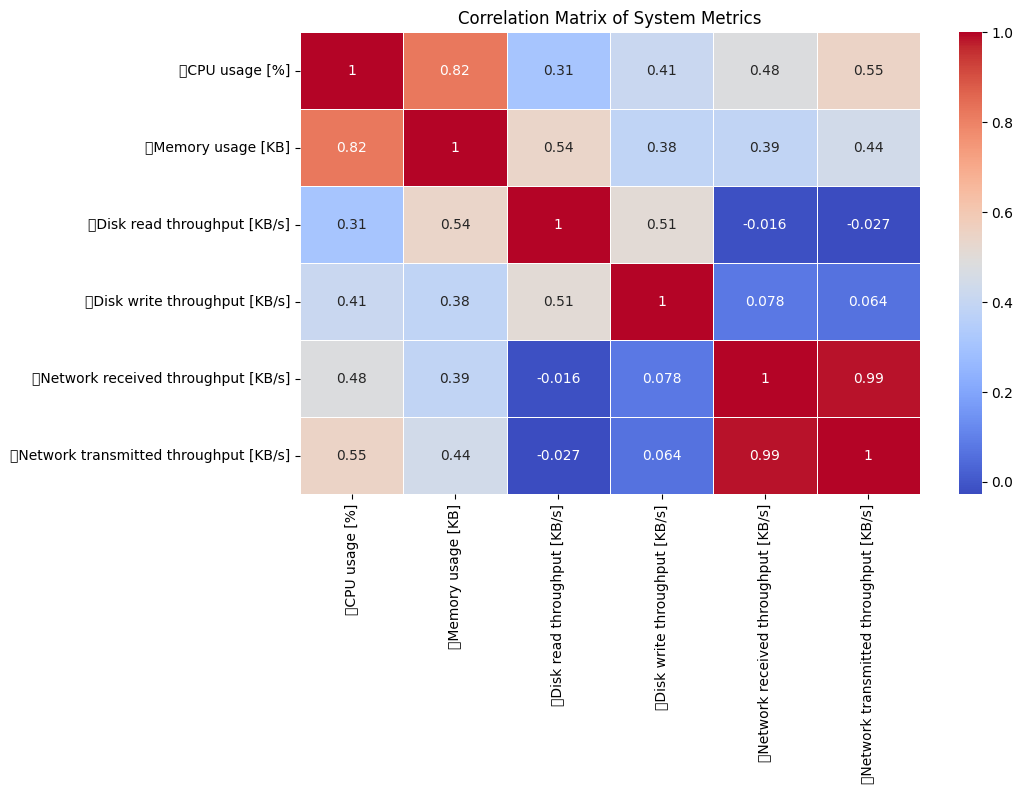

In [41]:
# Step 4: Correlation Matrix
correlation_matrix = data_cleaned[['\tCPU usage [%]', '\tMemory usage [KB]', '\tDisk read throughput [KB/s]',
                                   '\tDisk write throughput [KB/s]', '\tNetwork received throughput [KB/s]',
                                   '\tNetwork transmitted throughput [KB/s]']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of System Metrics')
plt.show()


In [42]:
# Step 6: Save final cleaned and engineered data to Excel
output_final_path = 'final_cleaned_data_with_features.xlsx'
data_cleaned.to_excel(output_final_path, index=False)
print(f"\nFinal cleaned data with features saved to {output_final_path}.")



Final cleaned data with features saved to final_cleaned_data_with_features.xlsx.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mean Absolute Error: 0.9386629020536009
R-squared: 0.8237283032792329
Root Mean Squared Error: 2.4576879184843903


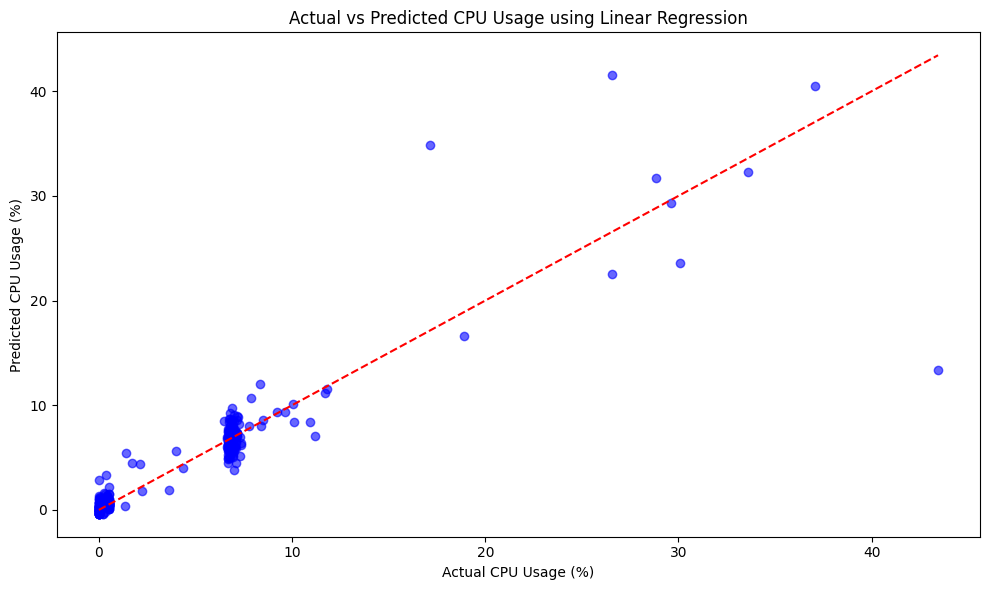

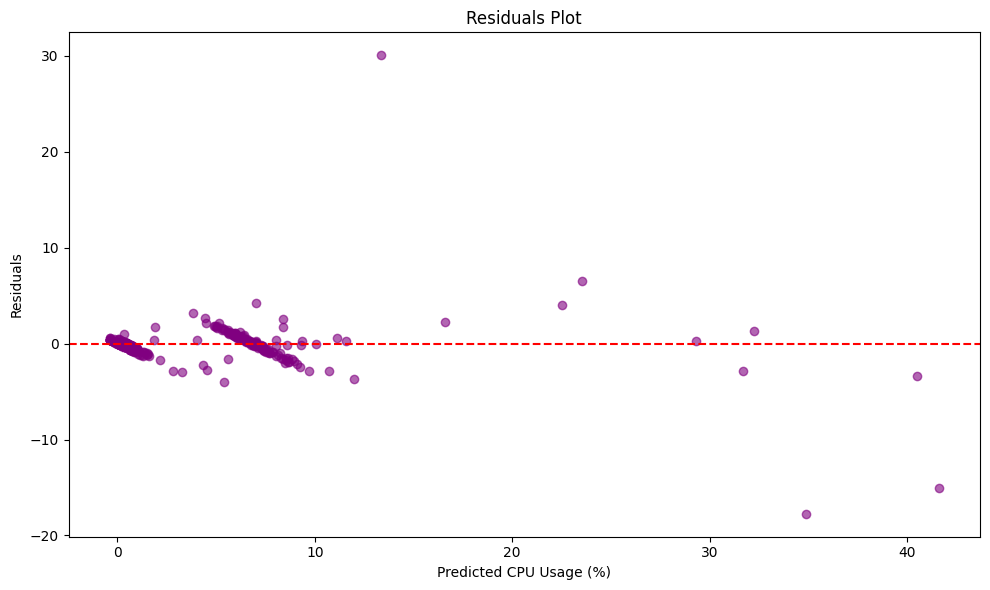

In [43]:
# Import necessary libraries
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Check model performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE calculation

print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")
print(f"Root Mean Squared Error: {rmse}")  # Print RMSE

# Visualize Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Ideal prediction line
plt.xlabel('Actual CPU Usage (%)')
plt.ylabel('Predicted CPU Usage (%)')
plt.title('Actual vs Predicted CPU Usage using Linear Regression')
plt.tight_layout()
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='purple', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted CPU Usage (%)')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mean Absolute Error: 0.9386629020536009
R-squared: 0.8237283032792329
Root Mean Squared Error: 2.4576879184843903
Accuracy (within 1.0%): 75.67%


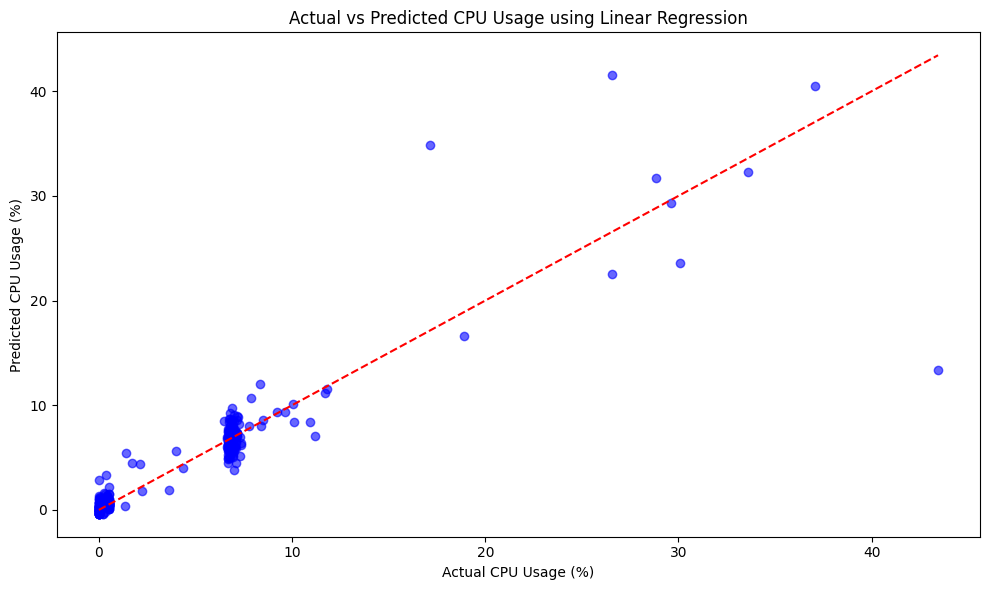

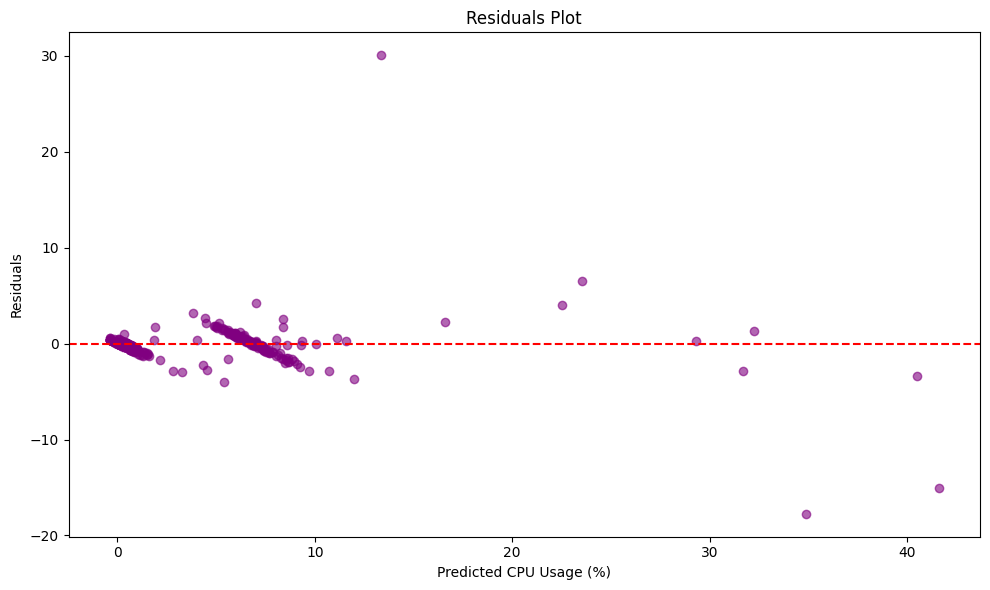

In [44]:
# Import necessary libraries
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Check model performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE calculation

print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")
print(f"Root Mean Squared Error: {rmse}")  # Print RMSE

# Define a tolerance level for accuracy
tolerance = 1.0  # e.g., 1% tolerance

# Calculate the number of accurate predictions within the tolerance
accurate_predictions = ((y_test - y_pred).abs() <= tolerance).sum()
total_predictions = y_test.shape[0]

# Calculate the accuracy percentage
accuracy_percentage = (accurate_predictions / total_predictions) * 100

print(f"Accuracy (within {tolerance}%): {accuracy_percentage:.2f}%")

# Visualize Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Ideal prediction line
plt.xlabel('Actual CPU Usage (%)')
plt.ylabel('Predicted CPU Usage (%)')
plt.title('Actual vs Predicted CPU Usage using Linear Regression')
plt.tight_layout()
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='purple', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted CPU Usage (%)')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.tight_layout()
plt.show()
